<a href="https://colab.research.google.com/github/bhaskarfx/nlp/blob/main/NLP_Text_Classification_using_CNN.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

## **Text Classification with CNN**

## **Word Embedding Techniques In NLP**

*by [Dr. Bhaskar Mondal](https://sites.google.com/view/bmondal/bhaskarmondal?authuser=3)*

**Subscribe to my YouTube Channel:** https://www.youtube.com/c/iqpop 


**Fatching the data from Github repository (Public)**



In [2]:
import pandas as pd
data = pd.read_csv('https://raw.githubusercontent.com/saadarshad102/Sentiment-Analysis-CNN/master/imdb_labelled.tsv', 
                   header = None, 
                   delimiter='\t')

In [3]:
data.columns = ['Text', 'Label']
data.head()

,Text,Label
0,"A very, very, very slow-moving, aimless movie ...",0
1,Not sure who was more lost - the flat characte...,0
2,Attempting artiness with black & white and cle...,0
3,Very little music or anything to speak of.,0
4,The best scene in the movie was when Gerardo i...,1


In [4]:
data.shape

(748, 2)

In [5]:
data.Label.value_counts()

1    386
0    362
Name: Label, dtype: int64

**Removing Punctuations**

In [6]:
import re
import string
def remove_punct(text):
    text_nopunct = ''
    text_nopunct = re.sub('['+string.punctuation+']', '', text)
    return text_nopunct
data['Text_Clean'] = data['Text'].apply(lambda x: remove_punct(x))

In [7]:
data.head()

,Text,Label,Text_Clean
0,"A very, very, very slow-moving, aimless movie ...",0,A very very very slowmoving aimless movie abou...
1,Not sure who was more lost - the flat characte...,0,Not sure who was more lost the flat character...
2,Attempting artiness with black & white and cle...,0,Attempting artiness with black white and clev...
3,Very little music or anything to speak of.,0,Very little music or anything to speak of
4,The best scene in the movie was when Gerardo i...,1,The best scene in the movie was when Gerardo i...


**Tokeniation**

In [8]:
import nltk
nltk.download('punkt')

[nltk_data] Downloading package punkt to /root/nltk_data...
[nltk_data]   Unzipping tokenizers/punkt.zip.


True

In [9]:
from nltk import word_tokenize
tokens = [word_tokenize(sen) for sen in data.Text_Clean]

In [10]:
tokens[1]

['Not',
 'sure',
 'who',
 'was',
 'more',
 'lost',
 'the',
 'flat',
 'characters',
 'or',
 'the',
 'audience',
 'nearly',
 'half',
 'of',
 'whom',
 'walked',
 'out']

**Convert tet to lower case**

In [11]:
def lower_token(tokens): 
    return [w.lower() for w in tokens]    
lower_tokens = [lower_token(token) for token in tokens]

In [12]:
lower_tokens[1]

['not',
 'sure',
 'who',
 'was',
 'more',
 'lost',
 'the',
 'flat',
 'characters',
 'or',
 'the',
 'audience',
 'nearly',
 'half',
 'of',
 'whom',
 'walked',
 'out']

## **Removing Stop words**

**Stop Words with NLTK**

Stop Words with Gensim

Stop Words with SpaCy



In [13]:
nltk.download('stopwords')

[nltk_data] Downloading package stopwords to /root/nltk_data...
[nltk_data]   Unzipping corpora/stopwords.zip.


True

In [14]:
from nltk.corpus import stopwords
stops=stopwords.words('english')
print(len(stops))
print(stops)

179
['i', 'me', 'my', 'myself', 'we', 'our', 'ours', 'ourselves', 'you', "you're", "you've", "you'll", "you'd", 'your', 'yours', 'yourself', 'yourselves', 'he', 'him', 'his', 'himself', 'she', "she's", 'her', 'hers', 'herself', 'it', "it's", 'its', 'itself', 'they', 'them', 'their', 'theirs', 'themselves', 'what', 'which', 'who', 'whom', 'this', 'that', "that'll", 'these', 'those', 'am', 'is', 'are', 'was', 'were', 'be', 'been', 'being', 'have', 'has', 'had', 'having', 'do', 'does', 'did', 'doing', 'a', 'an', 'the', 'and', 'but', 'if', 'or', 'because', 'as', 'until', 'while', 'of', 'at', 'by', 'for', 'with', 'about', 'against', 'between', 'into', 'through', 'during', 'before', 'after', 'above', 'below', 'to', 'from', 'up', 'down', 'in', 'out', 'on', 'off', 'over', 'under', 'again', 'further', 'then', 'once', 'here', 'there', 'when', 'where', 'why', 'how', 'all', 'any', 'both', 'each', 'few', 'more', 'most', 'other', 'some', 'such', 'no', 'nor', 'not', 'only', 'own', 'same', 'so', 'than

In [15]:
def remove_stopwords(lower_tokens):
    filtered_words=[]
    for sentence in lower_tokens:
        temp_list=[]
        for word in sentence:
            if word not in stops:
                temp_list.append(word)
        filtered_words.append(temp_list)
    return filtered_words

In [16]:
filtered_words=remove_stopwords(lower_tokens)
len(filtered_words)

748

In [17]:
data['Text_Final'] = [' '.join(sen) for sen in filtered_words]
data['tokens'] = filtered_words

In [18]:
data.head()

,Text,Label,Text_Clean,Text_Final,tokens
0,"A very, very, very slow-moving, aimless movie ...",0,A very very very slowmoving aimless movie abou...,slowmoving aimless movie distressed drifting y...,"[slowmoving, aimless, movie, distressed, drift..."
1,Not sure who was more lost - the flat characte...,0,Not sure who was more lost the flat character...,sure lost flat characters audience nearly half...,"[sure, lost, flat, characters, audience, nearl..."
2,Attempting artiness with black & white and cle...,0,Attempting artiness with black white and clev...,attempting artiness black white clever camera ...,"[attempting, artiness, black, white, clever, c..."
3,Very little music or anything to speak of.,0,Very little music or anything to speak of,little music anything speak,"[little, music, anything, speak]"
4,The best scene in the movie was when Gerardo i...,1,The best scene in the movie was when Gerardo i...,best scene movie gerardo trying find song keep...,"[best, scene, movie, gerardo, trying, find, so..."


In [19]:
from nltk.corpus import stopwords
stoplist = stopwords.words('english')
def removeStopWords(tokens): 
    return [word for word in tokens if word not in stoplist]
filtered_words = [removeStopWords(sen) for sen in lower_tokens]
data['Text_Final'] = [' '.join(sen) for sen in filtered_words]
data['tokens'] = filtered_words

In [20]:
data.head()

,Text,Label,Text_Clean,Text_Final,tokens
0,"A very, very, very slow-moving, aimless movie ...",0,A very very very slowmoving aimless movie abou...,slowmoving aimless movie distressed drifting y...,"[slowmoving, aimless, movie, distressed, drift..."
1,Not sure who was more lost - the flat characte...,0,Not sure who was more lost the flat character...,sure lost flat characters audience nearly half...,"[sure, lost, flat, characters, audience, nearl..."
2,Attempting artiness with black & white and cle...,0,Attempting artiness with black white and clev...,attempting artiness black white clever camera ...,"[attempting, artiness, black, white, clever, c..."
3,Very little music or anything to speak of.,0,Very little music or anything to speak of,little music anything speak,"[little, music, anything, speak]"
4,The best scene in the movie was when Gerardo i...,1,The best scene in the movie was when Gerardo i...,best scene movie gerardo trying find song keep...,"[best, scene, movie, gerardo, trying, find, so..."


## **Stemming and Lemmatization**


**Stemming:**
*   Stemming is a text normalization technique that cuts off the end or beginning of a word by taking into account a list of common prefixes or suffixes that could be found in that word
*   It is a rudimentary rule-based process of stripping the suffixes (“ing”, “ly”, “es”, “s” etc) from a word

**Lemmatization:**


*  organized & step-by-step procedure of obtaining the root form of the word. *   It uses the vocabulary (dictionary importance of words) and morphological analysis (word structure and grammar relations).



In [21]:
from nltk.stem import PorterStemmer
ps =PorterStemmer()
# data['stem'] = ps.stem(data['tokens'])
def Stem_words(tokens):
    root_words=[]
    for sentence in tokens:
        temp_list=[]
        for word in sentence:
            if word not in stops:
              rootWord=ps.stem(word)
              temp_list.append(rootWord)
        root_words.append(temp_list)
    return root_words

In [22]:
root_words=Stem_words(data['tokens'])
data['stems'] = root_words
data.head()

,Text,Label,Text_Clean,Text_Final,tokens,stems
0,"A very, very, very slow-moving, aimless movie ...",0,A very very very slowmoving aimless movie abou...,slowmoving aimless movie distressed drifting y...,"[slowmoving, aimless, movie, distressed, drift...","[slowmov, aimless, movi, distress, drift, youn..."
1,Not sure who was more lost - the flat characte...,0,Not sure who was more lost the flat character...,sure lost flat characters audience nearly half...,"[sure, lost, flat, characters, audience, nearl...","[sure, lost, flat, charact, audienc, nearli, h..."
2,Attempting artiness with black & white and cle...,0,Attempting artiness with black white and clev...,attempting artiness black white clever camera ...,"[attempting, artiness, black, white, clever, c...","[attempt, arti, black, white, clever, camera, ..."
3,Very little music or anything to speak of.,0,Very little music or anything to speak of,little music anything speak,"[little, music, anything, speak]","[littl, music, anyth, speak]"
4,The best scene in the movie was when Gerardo i...,1,The best scene in the movie was when Gerardo i...,best scene movie gerardo trying find song keep...,"[best, scene, movie, gerardo, trying, find, so...","[best, scene, movi, gerardo, tri, find, song, ..."


In [23]:
nltk.download('wordnet')

[nltk_data] Downloading package wordnet to /root/nltk_data...
[nltk_data]   Unzipping corpora/wordnet.zip.


True

In [24]:
from nltk.stem import WordNetLemmatizer
wordnet_lemmatizer = WordNetLemmatizer()
# data['stem'] = ps.stem(data['tokens'])
def Lem_words(tokens):
    lemma_word = []
    for sentence in tokens:
        temp_list=[]
        for word in sentence:
            if word not in stops:
              word1 = wordnet_lemmatizer.lemmatize(word, pos = "n")
              word2 = wordnet_lemmatizer.lemmatize(word1, pos = "v")
              word3 = wordnet_lemmatizer.lemmatize(word2, pos = ("a"))
              temp_list.append(word3)
        lemma_word.append(temp_list)
    return lemma_word

In [25]:
lemma_word=Lem_words(data['tokens'])
data['lemma'] = lemma_word
data.head()

,Text,Label,Text_Clean,Text_Final,tokens,stems,lemma
0,"A very, very, very slow-moving, aimless movie ...",0,A very very very slowmoving aimless movie abou...,slowmoving aimless movie distressed drifting y...,"[slowmoving, aimless, movie, distressed, drift...","[slowmov, aimless, movi, distress, drift, youn...","[slowmoving, aimless, movie, distress, drift, ..."
1,Not sure who was more lost - the flat characte...,0,Not sure who was more lost the flat character...,sure lost flat characters audience nearly half...,"[sure, lost, flat, characters, audience, nearl...","[sure, lost, flat, charact, audienc, nearli, h...","[sure, lose, flat, character, audience, nearly..."
2,Attempting artiness with black & white and cle...,0,Attempting artiness with black white and clev...,attempting artiness black white clever camera ...,"[attempting, artiness, black, white, clever, c...","[attempt, arti, black, white, clever, camera, ...","[attempt, artiness, black, white, clever, came..."
3,Very little music or anything to speak of.,0,Very little music or anything to speak of,little music anything speak,"[little, music, anything, speak]","[littl, music, anyth, speak]","[little, music, anything, speak]"
4,The best scene in the movie was when Gerardo i...,1,The best scene in the movie was when Gerardo i...,best scene movie gerardo trying find song keep...,"[best, scene, movie, gerardo, trying, find, so...","[best, scene, movi, gerardo, tri, find, song, ...","[best, scene, movie, gerardo, try, find, song,..."


**Lets update the Dataframe for our work**

In [26]:
data.columns

Index(['Text', 'Label', 'Text_Clean', 'Text_Final', 'tokens', 'stems',
       'lemma'],
      dtype='object')

In [27]:
pos = []
neg = []
for l in data.Label:
    if l == 0:
        pos.append(0)
        neg.append(1)
    elif l == 1:
        pos.append(1)
        neg.append(0)
data['Pos']= pos
data['Neg']= neg

data = data[['Text_Final', 'lemma', 'Label', 'Pos', 'Neg']]
data.head()

,Text_Final,lemma,Label,Pos,Neg
0,slowmoving aimless movie distressed drifting y...,"[slowmoving, aimless, movie, distress, drift, ...",0,0,1
1,sure lost flat characters audience nearly half...,"[sure, lose, flat, character, audience, nearly...",0,0,1
2,attempting artiness black white clever camera ...,"[attempt, artiness, black, white, clever, came...",0,0,1
3,little music anything speak,"[little, music, anything, speak]",0,0,1
4,best scene movie gerardo trying find song keep...,"[best, scene, movie, gerardo, try, find, song,...",1,1,0


## **Splite the data set in training and Test sets**

In [28]:
pip install sklearn

In [29]:
from sklearn.model_selection import train_test_split
data_train, data_test = train_test_split(data, 
                                         test_size=0.10, 
                                         random_state=42)

# Keras Tokenizer Class
We will discuss the following methods of Keras Tokenizer class in the article –
*   fit_on_texts
*   texts_to_sequences
*   texts_to_matrix
*   sequences_to_matrix

In [30]:
all_training_words = [word for tokens in data_train["lemma"] for word in tokens]
training_sentence_lengths = [len(tokens) for tokens in data_train["lemma"]]
TRAINING_VOCAB = sorted(list(set(all_training_words)))
print("%s words total, with a vocabulary size of %s" % (len(all_training_words), len(TRAINING_VOCAB)))
print("Max sentence length is %s" % max(training_sentence_lengths))
MAX_SEQUENCE_LENGTH=max(training_sentence_lengths)

7218 words total, with a vocabulary size of 2460
Max sentence length is 789


**fit_on_texts:**
The *fit_on_texts* method is a part of Keras tokenizer class which is used to update the internal vocabulary for the texts list. We need to call be before using other methods of *texts_to_sequences* or *texts_to_matrix*.

In [31]:
from keras.preprocessing.text import Tokenizer
from keras.preprocessing.sequence import pad_sequences

tokenizer = Tokenizer(num_words=len(TRAINING_VOCAB), lower=True, char_level=False)
tokenizer.fit_on_texts(data_train["lemma"].tolist())

The object returned by fit_on_texts can be used to derive more information by using the following attributes-
*   word_counts : It is a dictionary of words along with the counts.
*   word_docs : Again a dictionary of words, this tells us how many documents contain this word
*   word_index : In this dictionary, we have unique integers assigned to each word.
*   document_count : This integer count will tell us the total number of documents used for fitting the tokenizer.

In [32]:
print("The document count",tokenizer.document_count)
print("The count of words",tokenizer.word_counts)
print("The word index",tokenizer.word_index)
print("The word docs",tokenizer.word_docs)

The document count 673
The count of words OrderedDict([('masterful', 2), ('piece', 11), ('filmmaking', 2), ('many', 14), ('theme', 4), ('simmer', 1), ('occasionally', 4), ('boil', 1), ('wart', 1), ('study', 1), ('poet', 1), ('bohemian', 1), ('selfindulgent', 2), ('wartime', 1), ('year', 18), ('span', 1), ('aerial', 3), ('bombardment', 1), ('london', 1), ('outward', 1), ('tranquillity', 1), ('welsh', 1), ('coastal', 1), ('retreat', 1), ('borderline', 1), ('friendship', 1), ('lust', 1), ('love', 33), ('dedication', 2), ('art', 13), ('experience', 6), ('versus', 2), ('practical', 1), ('concern', 2), ('jealousy', 1), ('rivalry', 1), ('cowardice', 1), ('egotism', 1), ('heroism', 1), ('selfsacrifice', 1), ('earth', 2), ('iron', 1), ('film', 173), ('great', 41), ('disappointment', 2), ('role', 8), ('play', 26), ('well', 29), ('budget', 5), ('evidently', 1), ('limit', 1), ('actingeven', 1), ('professional', 1), ('drago', 4), ('debbie', 1), ('rochonwas', 1), ('terrible', 12), ('direct', 11), ('

given a corpus of documents, **texts_to_sequences** assign integers to words.

In [33]:
MAX_SEQUENCE_LENGTH = 50
EMBEDDING_DIM = 300

In [34]:
training_sequences = tokenizer.texts_to_sequences(data_train["lemma"].tolist())
print("The sequences generated from text are : ",training_sequences)

train_word_index = tokenizer.word_index
print('Found %s unique tokens.' % len(train_word_index))

The sequences generated from text are :  [[564, 90, 565, 67, 290, 943, 291, 944, 945, 946, 947, 948, 566, 949, 49, 950, 401, 951, 952, 953, 954, 955, 956, 957, 958, 959, 960, 18, 567, 74, 181, 568, 961, 569, 962, 963, 964, 965, 568, 966, 967], [570, 968, 2], [14, 571], [129, 26, 21], [226, 969, 970], [971, 972, 292, 973, 974, 81, 91, 5, 293, 975, 976, 294, 977, 130, 42, 295, 978], [227], [30, 43, 13], [979, 980, 572, 573, 62], [15, 296, 39, 402, 21, 297, 981, 403, 44, 26, 7, 40, 228, 12], [31, 8], [298, 982, 983, 574, 984, 575, 576, 985, 986], [987, 404, 2, 111, 228, 12], [577, 988, 1, 101, 5], [92, 1, 299, 19, 7, 578, 7, 989, 145], [93, 112, 146, 182, 300, 579, 405, 990, 183, 991, 992], [580, 993, 994, 995, 94, 301, 13], [131, 44, 406, 302, 581, 7, 996, 997, 998, 95, 581, 229, 131, 132, 75, 582, 230, 26, 999, 67, 302], [22, 68, 12, 1000, 583, 82, 1001], [83], [32, 14], [1002], [1, 407, 1003, 32, 18, 408, 231, 8, 27, 409, 8], [145, 184], [232, 147, 33, 9, 303, 41, 16, 42, 304, 28], [13

**tf.keras.preprocessing.sequence.pad_sequences** function Pads sequences to the same length.


**Arguments:**
*   sequences: List of lists, where each element is a sequence.
*   maxlen: Int, maximum length of all sequences.
*   dtype: Type of the output sequences.
*   padding: String, 'pre' or 'post': pad either before or after each sequence.
*   truncating: String, 'pre' or 'post': remove values from sequences larger    than maxlen, either at the beginning or at the end of the sequences.
*   value: Float, padding value.

## **Word Embedding**

In [36]:
import numpy as np
train_embedding_weights = np.zeros((len(train_word_index)+1, EMBEDDING_DIM))
print(train_embedding_weights)
print(train_embedding_weights.shape)

[[0. 0. 0. ... 0. 0. 0.]
 [0. 0. 0. ... 0. 0. 0.]
 [0. 0. 0. ... 0. 0. 0.]
 ...
 [0. 0. 0. ... 0. 0. 0.]
 [0. 0. 0. ... 0. 0. 0.]
 [0. 0. 0. ... 0. 0. 0.]]
(2461, 300)


In [37]:
len(train_word_index)

2460

## **Train the CNN Model**

In [40]:
train_cnn_data = pad_sequences(training_sequences, maxlen=MAX_SEQUENCE_LENGTH)

In [41]:
print(train_cnn_data)

[[   0    0    0 ...  568  966  967]
 [   0    0    0 ...  570  968    2]
 [   0    0    0 ...    0   14  571]
 ...
 [   0    0    0 ...   61 2456   27]
 [   0    0    0 ...   48   21  880]
 [   0    0    0 ...    1  400   48]]


In [42]:
test_sequences = tokenizer.texts_to_sequences(data_test["lemma"].tolist())
test_cnn_data = pad_sequences(test_sequences, maxlen=MAX_SEQUENCE_LENGTH)

In [43]:
label_names = ['Pos', 'Neg']

In [44]:
y_train = data_train[label_names].values
y_test = data_test[label_names].values

In [45]:
x_train = train_cnn_data
y_tr = y_train

In this tutorial, you will discover how to develop one-dimensional convolutional neural networks (CNN)

CNN will consist of

*   **Embedding layer**
*   Input() is used to instantiate a Keras tensor.
*   Conv1D class
*   GlobalMaxPooling1D

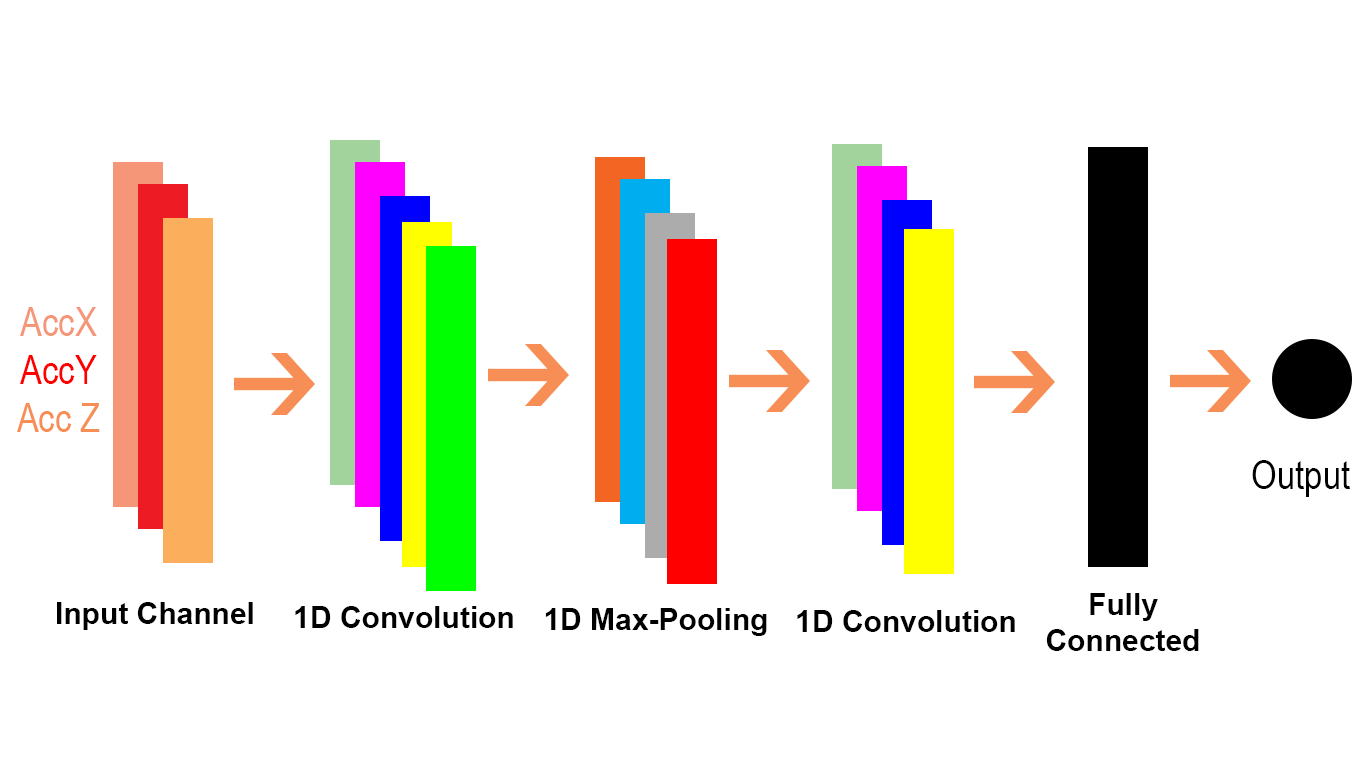



*Arguments* of `Embedding Class`
  *   input_dim: Integer. Size of the vocabulary, i.e. maximum integer index + 1.
  *   output_dim: Integer. Dimension of the dense embedding.
  *   embeddings_initializer: Initializer for the embeddings matrix (see keras.initializers).
  *   embeddings_regularizer: Regularizer function applied to the embeddings matrix (see keras.regularizers).
  *   embeddings_constraint: Constraint function applied to the embeddings matrix (see keras.constraints).
  *   mask_zero: Boolean, whether or not the input value 0 is a special "padding" value that should be masked out. This is useful when using recurrent layers which may take variable length input. If this is True, then all subsequent layers in the model need to support masking or an exception will be raised. If mask_zero is set to True, as a consequence, index 0 cannot be used in the vocabulary (input_dim should equal size of vocabulary + 1).
  *   input_length: Length of input sequences, when it is constant. This argument is required if you are going to connect Flatten then Dense layers upstream (without it, the shape of the dense outputs cannot be computed).
*   Input shape
  *   2D tensor with shape: (batch_size, input_length).
*   Output shape
  *   3D tensor with shape: (batch_size, input_length, output_dim).



```
embedding_layer = Embedding(num_words,
                            embedding_dim,
                            weights=[embeddings],
                            input_length=max_sequence_length,
                            trainable=False)
```





**Input()** function is used to instantiate a Keras tensor.


*   shape: A shape tuple (integers), not including the batch size. For instance, shape=(32,) indicates that the expected input will be batches of 32-dimensional vectors. Elements of this tuple can be None; 'None' elements represent dimensions where the shape is not known.
*   batch_size: optional static batch size (integer).
*   name: An optional name string for the layer. Should be unique in a model (do not reuse the same name twice). It will be autogenerated if it isn't provided.
*   dtype: The data type expected by the input, as a string (float32, float64, int32...)

Returns A tensor.

`sequence_input = Input(shape=(max_sequence_length,), dtype='int32')`
    #Creating Embedding layer
`embedded_sequences = embedding_layer(sequence_input)`


# Convoluation

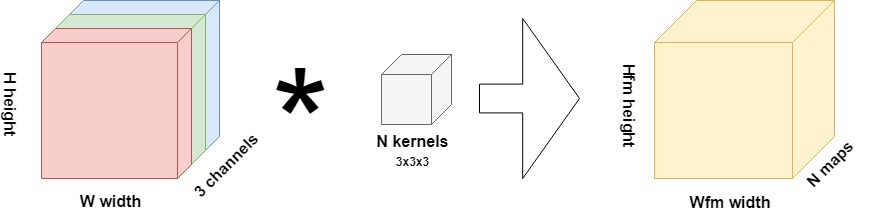

The inputs for this layer are 2D data, of height $H$, width $W$ and with one channels (in our case). Using a $3\times  3\times 3$ kernel, a convolution operation is performed over the input, generating $N$ “*feature maps*” of size $H_{fm}\times W_{fm}$. One feature map learns one particular feature present in the input. Through activating, these feature maps contribute to the outcome prediction during training, and for new data as well. $N$ can be configured by the machine learning engineer prior to starting the training process.

say we set $N=64$, then 64 such maps would be produced in this first layer.

In the *convolution operation* of a ConvNet, a small block slides over the entire input data, taking element-wise multiplications with the part of the data it currently slides over (Chollet, 2017). 

**feature map:**  In the first layer, we learn a feature map based on very “concrete” aspects of the data. Here, the feature map consists of very low-level elements (say for an image image, such as curves and edges, a.k.a. the details). 

However, we cannot see the higher-level patterns with just one convolutional layer. We need many, stacked together, to learn these patterns. This is also called building a spatial hierarchy (Chollet, 2017). Good spatial hierarchies summarize the data substantially when moving from bottom to top, and they’re like a pyramid. Here’s a good one versus a bad one:

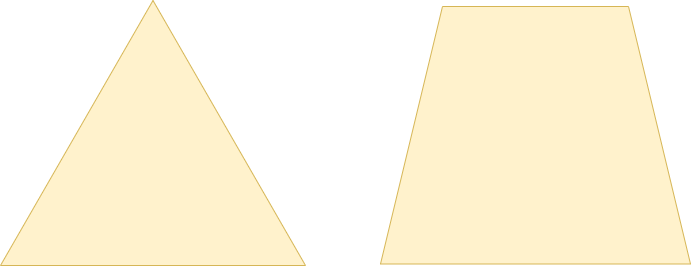

A good spatial hierarchy (left) versus a worse one (right).

**Filters**: Each convolution layer consists of several convolution channels (aka. depth or filters). In practice, they are a number such as 64, 128, 256, 512 etc. This is equal to number of channels in the output of a convolutional layer. kernel_size, on the other hand, is the size of these convolution filters. In practice, they take values such as 3x3 or 1x1 or 5x5. To abbreviate, they can be written as 1 or 3 or 5 as they are mostly square in practice.

`filter_sizes = [2,3,4,5,6]`

**Convolution layer** 

*   In 1D CNN, kernel moves in 1 direction. Input and output data of 1D CNN is 2 dimensional. Mostly used on Time-Series data.

*   In 2D CNN, kernel moves in 2 directions. Input and output data of 2D CNN is 3 dimensional. Mostly used on Image data.

*   In 3D CNN, kernel moves in 3 directions. Input and output data of 3D CNN is 4 dimensional. Mostly used on 3D Image data (MRI, CT Scans).

**1D convolution layer** 
Arguments

*   filters: Integer, the dimensionality of the output space (i.e. the number of output filters in the convolution).
*   kernel_size: An integer or tuple/list of a single integer, specifying the length of the 1D convolution window.
*   activation: Activation function to use. If you don't specify anything, no activation is applied (see keras.activations).

`l_conv = Conv1D(filters=200, kernel_size=filter_size, activation='relu')(embedded_sequences)`

**Input shape**

3+D tensor with shape: batch_shape + (steps, input_dim)

**Output shape**

3+D tensor with shape: batch_shape + (new_steps, filters) 

**Returns**

A tensor of rank 3 representing activation(conv1d(inputs, kernel) + bias).

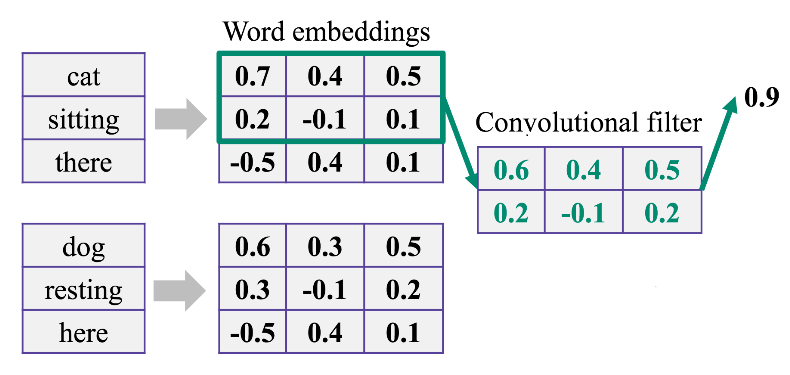

The **convoluation operations are relatively expensive**. Can’t this be done in a simpler way? Do we really need to have a hierarchy built up from convolutions only? The answer is no, and **pooling operations** prove this.

**Pooling** is basically “downscaling” the data obtained from the previous layers. It can be compared to shrinking an image to reduce its pixel density.

**downscaling**:  it is also done in a much simpler way by performing a hardcoded tensor operation such as max, rather than through a learned transformation, we don’t need the relatively expensive operation of learning the weights (Chollet, 2017). This way, we get a nice and possibly useful spatial hierarchy at a fraction of the cost.

# GlobalMaxPooling1D layer

GlobalMaxPooling1D Downsamples the input representation by taking the maximum value or takes the max vector over the steps dimension. 

GlobalMaxPooling1D class

```
l_pool = GlobalMaxPooling1D()(l_conv)
```



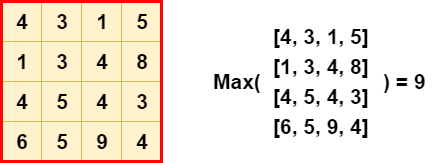

# Dropout layer

**Dropout class** The Dropout layer randomly sets input units to 0 with a frequency of rate at each step during training time, which helps prevent overfitting. Inputs not set to 0 are scaled up by 1/(1 - rate) such that the sum over all inputs is unchanged.

**Arguments**

rate: Float between 0 and 1. Fraction of the input units to drop.

`x = Dropout(0.1)(l_merge)`

Dropout is a technique where randomly selected neurons are ignored during training. They are “dropped-out” randomly. This means that their contribution to the activation of downstream neurons is temporally removed on the forward pass and any weight updates are not applied to the neuron on the backward pass.

# Dense layer

**Dense class** is the regular deeply connected neural network layer, which means each neuron in the dense layer receives input from all neurons of its previous layer. It is most common and frequently used layer.

In the background, the dense layer performs a matrix-vector multiplication. The values used in the matrix are actually parameters that can be trained and updated with the help of backpropagation.

The output generated by the dense layer is an ‘m’ dimensional vector. Thus, dense layer is basically used for changing the dimensions of the vector. Dense layers also applies operations like rotation, scaling, translation on the vector.

`x = Dense(128, activation='relu')(x)`

The output shape of the Dense layer will be affected by the number of neuron / 

*   `units` represent the number of units and it affects the output layer. it uses positive integer as it value and represents the output size of the layer. 
It is the unit parameter itself that plays a major role in the size of the weight matrix along with the bias vector.
*   `activation` represents the activation function.

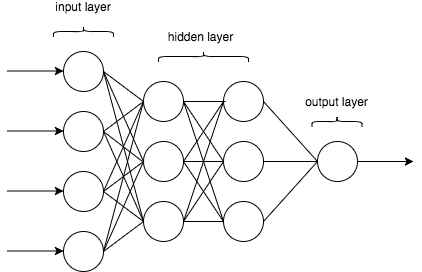

In [64]:
from keras.layers import Dense, Dropout, Reshape, Flatten, concatenate, Input, Conv1D, GlobalMaxPooling1D, Embedding
from keras.models import Model


def ConvNet(embeddings, max_sequence_length, num_words, embedding_dim, labels_index):
    #Embedding layer (Embedding Class)
    embedding_layer = Embedding(num_words,
                            embedding_dim,
                            weights=[embeddings],
                            input_length=max_sequence_length,
                            trainable=False)
    #Input function
    sequence_input = Input(shape=(max_sequence_length,), dtype='int32')
    #Creating Embedding layer
    embedded_sequences = embedding_layer(sequence_input)

    convs = []
    filter_sizes = [2,3,4]

    for filter_size in filter_sizes:
        l_conv = Conv1D(filters=200, kernel_size=filter_size, activation='relu')(embedded_sequences)
        l_pool = GlobalMaxPooling1D()(l_conv)
        convs.append(l_pool)


    l_merge = concatenate(convs, axis=1)

    x = Dropout(0.1)(l_merge)  
    x = Dense(128, activation='relu')(x)
    x = Dropout(0.2)(x)
    preds = Dense(labels_index, activation='sigmoid')(x)
    #Keras model represents the actual neural network model.
    model = Model(sequence_input, preds)
    model.compile(loss='binary_crossentropy',
                  optimizer='adam',
                  metrics=['acc'])
    model.summary()
    return model

# Keras Compile Models

**Loss**: In machine learning, Loss function is used to find error or deviation in the learning process. Keras requires loss function during model compilation process.

**Optimizer**: In machine learning, Optimization is an important process which optimize the input weights by comparing the prediction and the loss function. Keras provides quite a few optimizer as a module

**Metrics**: In machine learning, Metrics is used to evaluate the performance of your model. It is similar to loss function, but not used in training process. Keras provides quite a few metrics as a module, metrics and they are as follows:
accuracy,
binary_accuracy,
categorical_accuracy, ect.

In [65]:
model = ConvNet(train_embedding_weights, MAX_SEQUENCE_LENGTH, len(train_word_index)+1, EMBEDDING_DIM, len(list(label_names)))

Model: "model_2"
__________________________________________________________________________________________________
 Layer (type)                   Output Shape         Param #     Connected to                     
 input_3 (InputLayer)           [(None, 50)]         0           []                               
                                                                                                  
 embedding_2 (Embedding)        (None, 50, 300)      738300      ['input_3[0][0]']                
                                                                                                  
 conv1d_10 (Conv1D)             (None, 49, 200)      120200      ['embedding_2[0][0]']            
                                                                                                  
 conv1d_11 (Conv1D)             (None, 48, 200)      180200      ['embedding_2[0][0]']            
                                                                                            

In [66]:
num_epochs = 3
batch_size = 34

In [67]:
hist = model.fit(x_train, y_tr, epochs=num_epochs, validation_split=0.1, shuffle=True, batch_size=batch_size)

Epoch 1/3
18/18 [==============================] - 5s 153ms/step - loss: 0.6931 - acc: 0.5223 - val_loss: 0.6926 - val_acc: 0.5735
Epoch 2/3
18/18 [==============================] - 2s 89ms/step - loss: 0.6930 - acc: 0.5223 - val_loss: 0.6924 - val_acc: 0.5735
Epoch 3/3
18/18 [==============================] - 2s 89ms/step - loss: 0.6929 - acc: 0.5223 - val_loss: 0.6920 - val_acc: 0.5735


## **Prediction and Results**

In [68]:
predictions = model.predict(test_cnn_data, batch_size=1024, verbose=1)

1/1 [==============================] - 0s 163ms/step


In [69]:
labels = [1, 0]

In [70]:
prediction_labels=[]
for p in predictions:
    prediction_labels.append(labels[np.argmax(p)])

In [72]:
sum(data_test.Label==prediction_labels)/len(prediction_labels)

0.41333333333333333

In [63]:
data_test.Label.value_counts()

0    44
1    31
Name: Label, dtype: int64

In [55]:
import sklearn.metrics as metrics

#Confusion Matrix and Classification Report
from sklearn.metrics import classification_report
from sklearn.metrics import confusion_matrix


print('Confusion Matrix')
print(confusion_matrix(data_test.Label, prediction_labels))

print('Classification Report')
target_names = ['Positive', 'Negative']
print(classification_report(data_test.Label, prediction_labels, target_names=target_names))

Confusion Matrix
[[ 0 44]
 [ 0 31]]
Classification Report
              precision    recall  f1-score   support

    Positive       0.00      0.00      0.00        44
    Negative       0.41      1.00      0.58        31

    accuracy                           0.41        75
   macro avg       0.21      0.50      0.29        75
weighted avg       0.17      0.41      0.24        75



/usr/local/lib/python3.7/dist-packages/sklearn/metrics/_classification.py:1318: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/usr/local/lib/python3.7/dist-packages/sklearn/metrics/_classification.py:1318: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/usr/local/lib/python3.7/dist-packages/sklearn/metrics/_classification.py:1318: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


https://www.kdnuggets.com/2020/03/tensorflow-keras-tokenization-text-data-prep.html

https://towardsdatascience.com/pre-trained-word-embedding-for-text-classification-end2end-approach-5fbf5cd8aead

https://blog.paperspace.com/pre-trained-word-embeddings-natural-language-processing/